# Using the eScriptorium Connector

This library provides a simple API to access the eScriptorium online platform.

Install with `pip install escriptorium-connector` and import it as follows.

In [ ]:
from src.escriptorium_connector import EscriptoriumConnector
import os
from dotenv import load_dotenv

## Instantiating the connector

It is probably a best practice to store your validation credentials separately. Here we use `python-dotenv` to get the API token and to set the eScriptorium instance address.

The url of the eScriptorium instance is passed to the connector along with the url address for the api and the users API token.

In [ ]:
load_dotenv()
url = str(os.getenv('ESCRIPTORIUM_URL'))
api = f'{url}api/'
token = str(os.getenv('ESCRIPTORIUM_TOKEN'))
escr = EscriptoriumConnector(url, api, token)

## Usage

Once instantiated, the connector provides well-documented and convenient methods to interact with your data on eScriptorium.

You might get a list of all your documents.

In [ ]:
my_documents = escr.get_documents()
document_pk = my_documents[0]["pk"]


In [ ]:
print(len(my_documents))
print(my_documents[0])

## Convenience

The connector provides several conveniences.  Perhaps the most broadly useful is automatically following the paging information to acquire the full dataset requested.  Here the request for document parts collects the full list of parts without the need to check if there are further pages of results available.

In [ ]:
document_parts = escr.get_document_parts(document_pk)

In [ ]:
print(len(document_parts))
selected_part = document_parts[333]
print(selected_part)

In [ ]:
image = escr.get_image(selected_part["image"]["uri"])

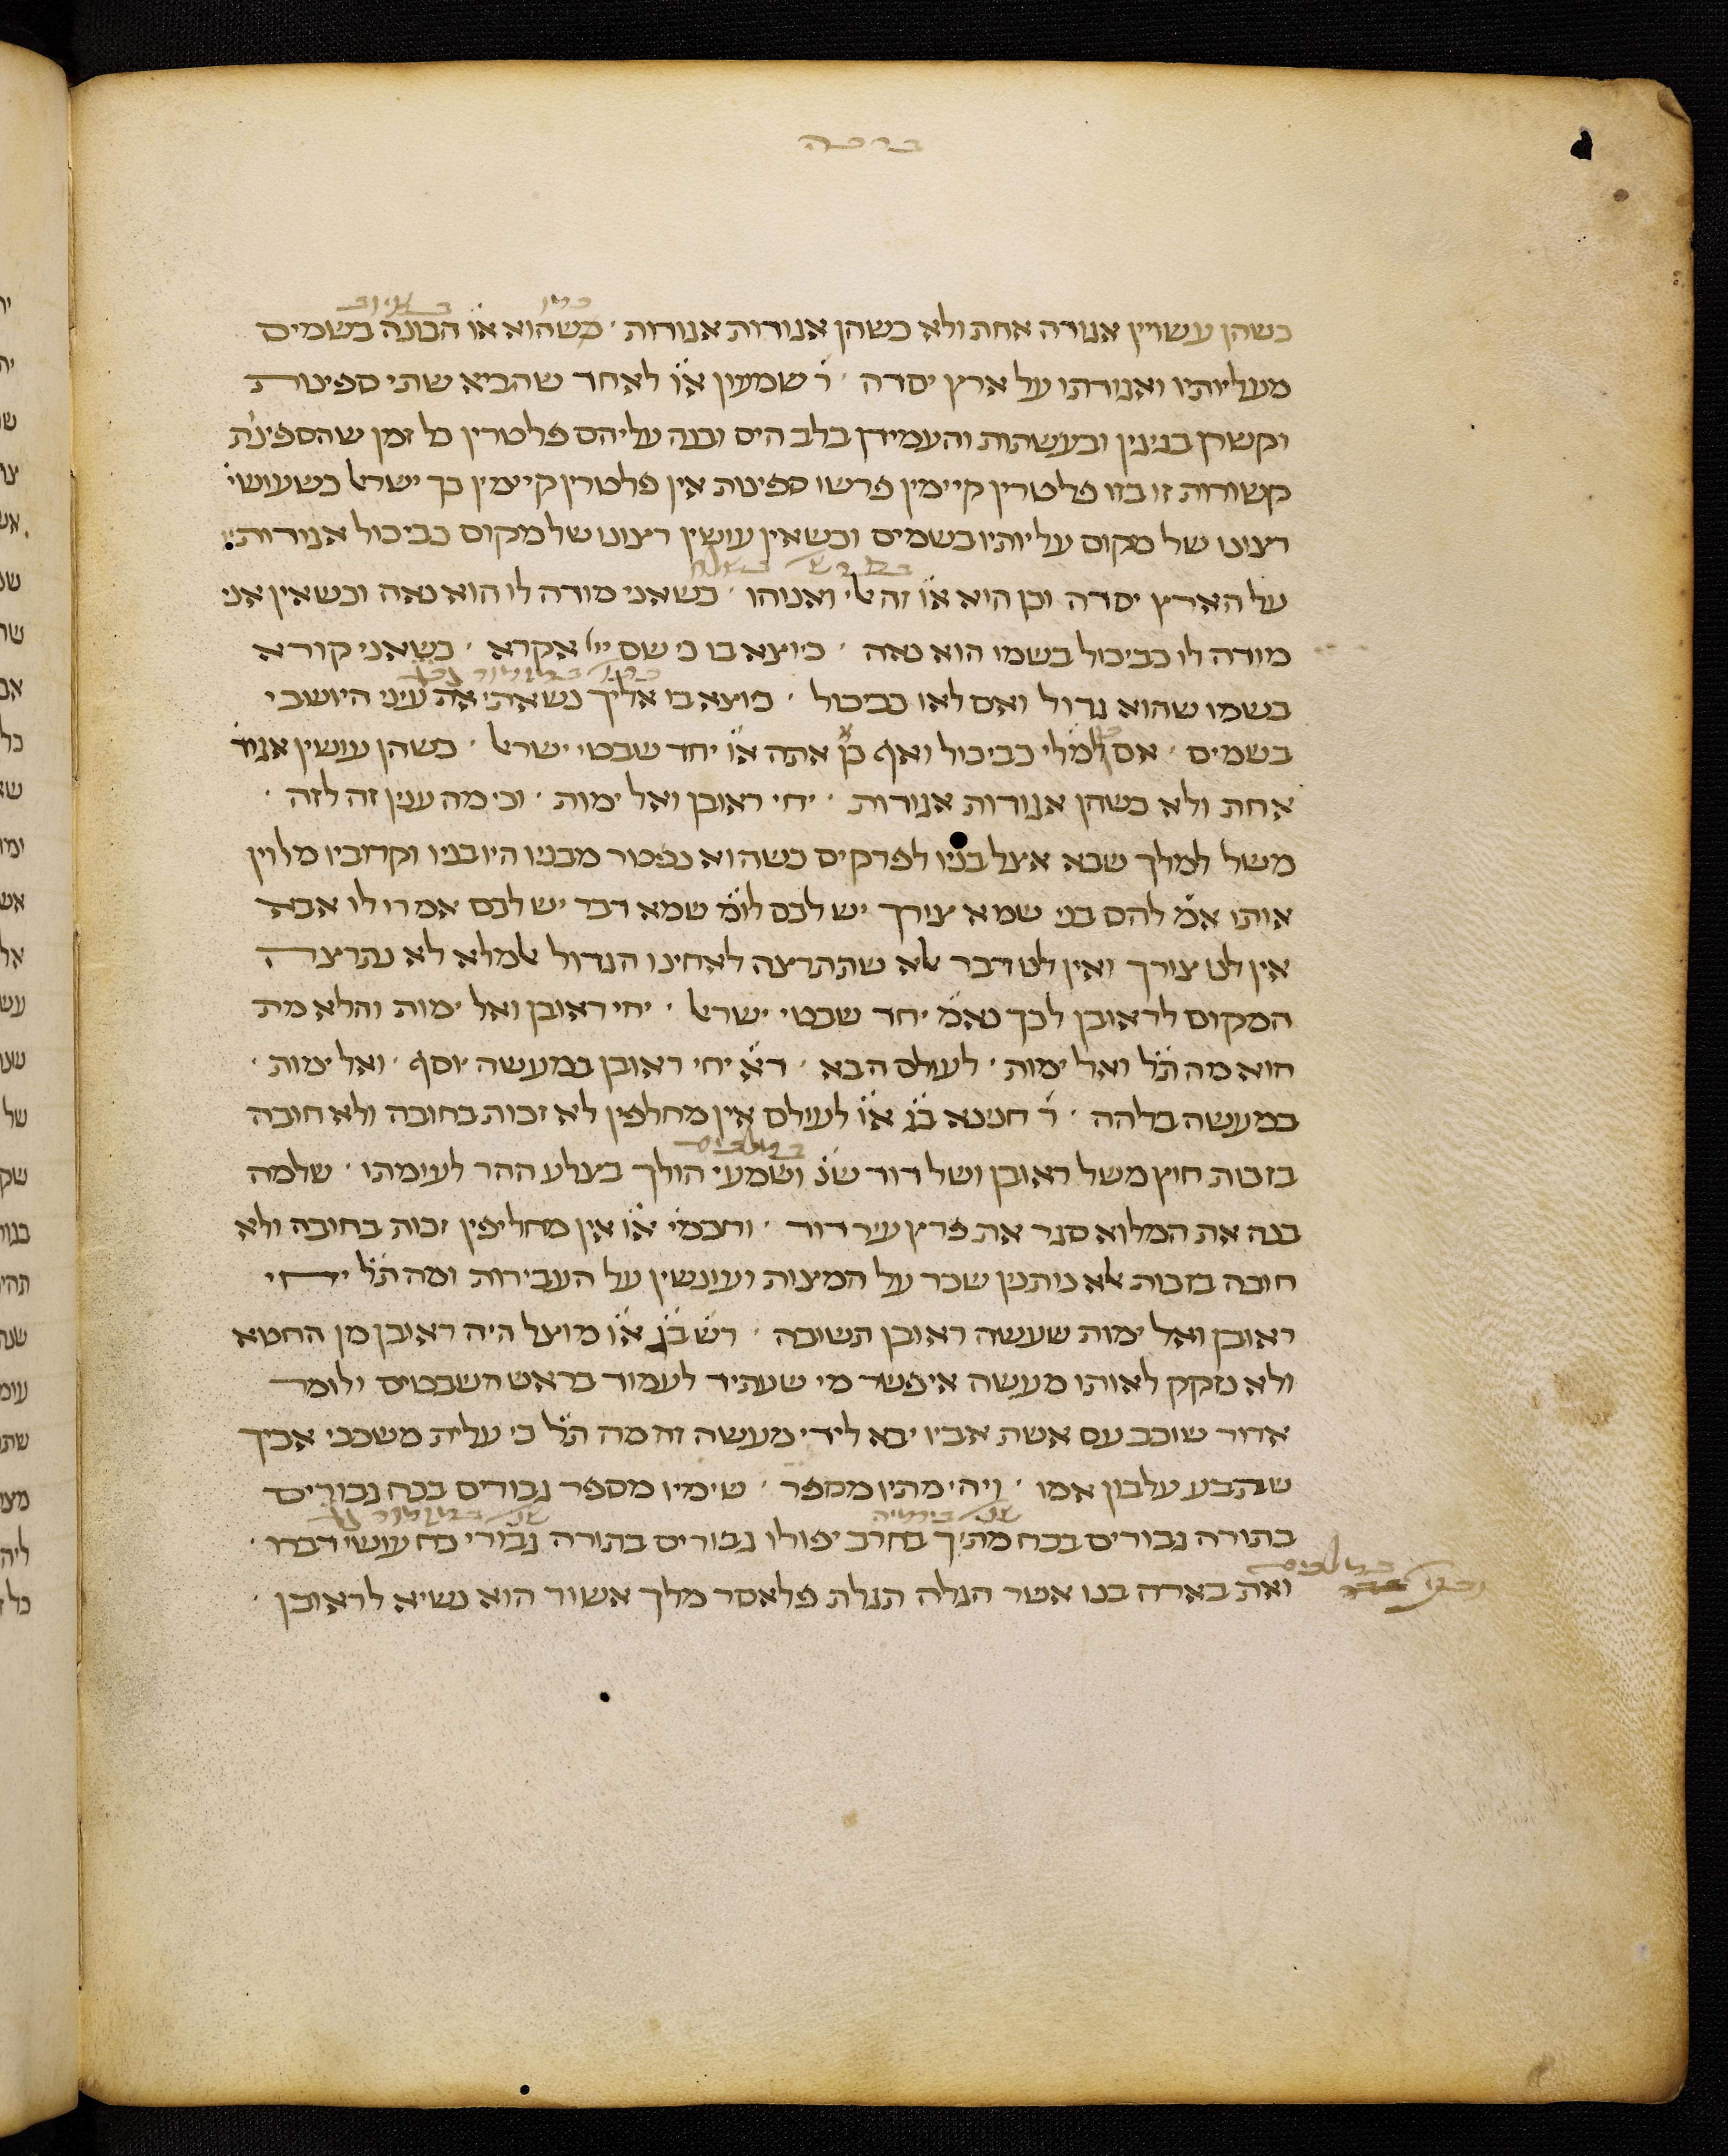

In [10]:
from IPython.display import Image
display(Image(image))